In [485]:
import torch
from torch.utils.data import Dataset,DataLoader,SequentialSampler,RandomSampler,BatchSampler,default_collate
import matplotlib.pyplot as plt
from torch.nn import Linear
from torch import optim,nn
import os
import torchvision.transforms.functional as func
import cv2
import numpy as np

In [384]:
# from numpy import imag


class shape_dataset(Dataset):
    def __init__(self,root,label,sh_id):
        self.root=root
        self.label=label
        self.sh_id=sh_id
        self.path=os.path.join(self.root,self.label)
        self.img_list=os.listdir(self.path)
    def __getitem__(self,index):
        self.image=cv2.imread(os.path.join(self.path,self.img_list[index]),cv2.IMREAD_GRAYSCALE)
        self.image=cv2.resize(self.image,(50,50),cv2.INTER_LINEAR)
        self.image=torch.tensor(self.image)
        self.image=self.image.float()/255.0
        self.label=torch.tensor(self.sh_id)
        self.label=self.label.float()
        return self.image,self.label

    def __len__(self):
        return len(self.img_list)

50


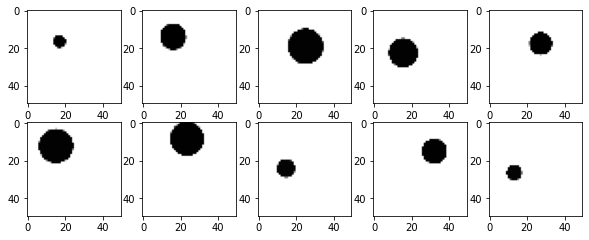

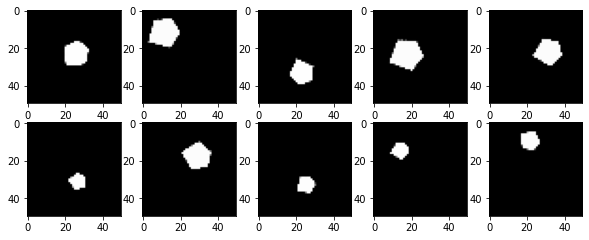

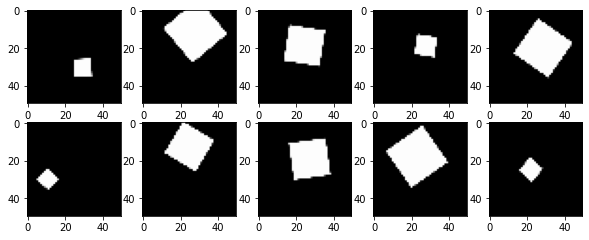

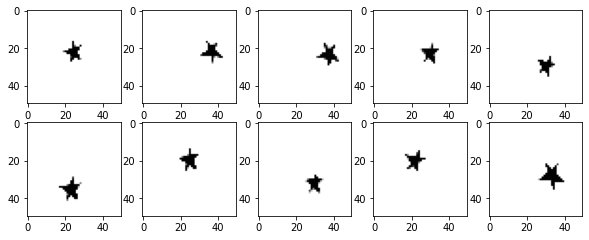

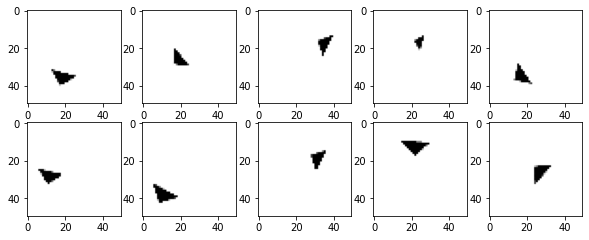

In [385]:



folder='Shape_Data'
classes=os.listdir(folder)
datasets=[]
sh_id=1
for i in (classes):
    # path=os.path.join(folder,i)
    label=i
    # print(len(os.listdir(os.path.join(folder,i))))
    datasets.append(shape_dataset(folder,label,sh_id))
    sh_id+=1
# print(datasets[0])
    



# fig= plt.figure(figsize=(10, 10))
count=0

for i in range(5):
    # print(datasets[i][0][0])
    fig= plt.figure(figsize=(10, 10))

    for j in range(10):
        count+=1
        fig.add_subplot(5,5,j+1)
        plt.imshow(datasets[i][j][0],cmap="gray")
print(count)

800 200
1
800 200
2
800 200
3
800 200
4
800 200
5


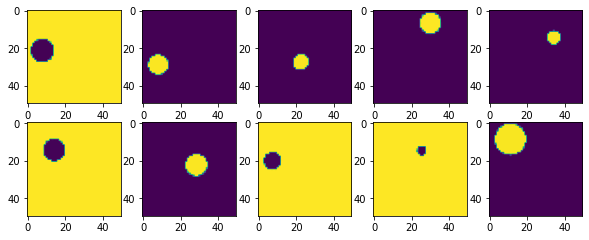

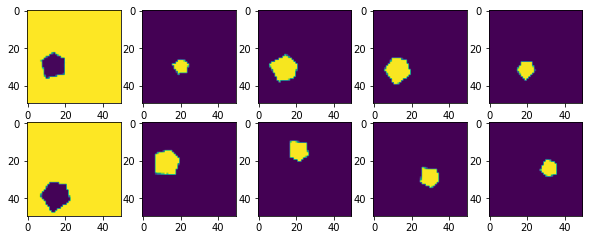

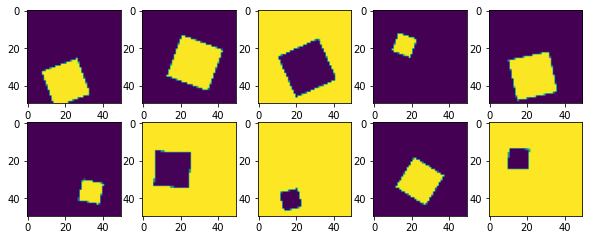

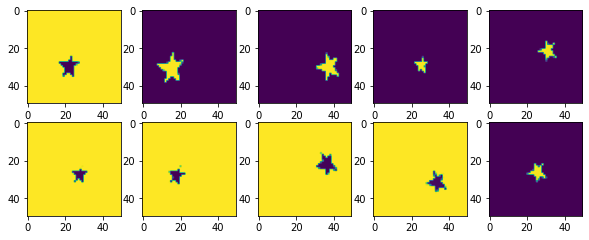

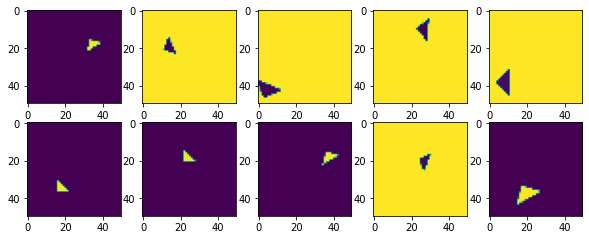

In [460]:
batch_size=1
train_loader=[]
test_loader=[]
for i in range(len(classes)):
    


    train_size = int(0.8 * len(datasets[i]))
    test_size = int(0.2*len(datasets[i]))

    train_dataset, test_dataset = torch.utils.data.random_split(datasets[i], [train_size, test_size])
    print(train_size,test_size)

    # print("Train dataset:::",train_dataset[0:],"Test dataset:::",test_dataset)

    # print(train_dataset,test_dataset)

    train_loader.append(DataLoader(dataset = train_dataset, batch_size = len(train_dataset)))
    test_loader.append(DataLoader(dataset = test_dataset, batch_size=len(test_dataset)))

    # sampler=SequentialSampler(datasets[i])
    data_loader=DataLoader(dataset=datasets[i],batch_size=batch_size,sampler=sampler)
    print(len(train_loader))
    count=0
    for x,y in train_loader[i]:
        # print(y)
        fig= plt.figure(figsize=(10, 10))
        for j in range(10):
            fig.add_subplot(5,5,j+1)
            plt.imshow(x[j])
        if(count==0):
            break

(tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]]), tensor(1.))
100
tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])


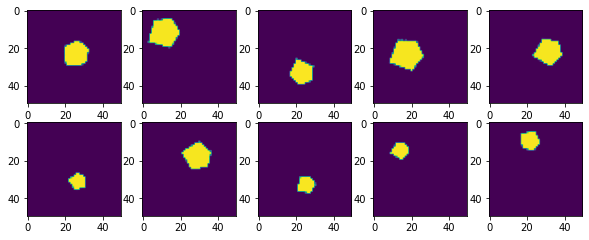

In [592]:
batch_size=10

print(datasets[0][0])
# for i in datasets:

sampler=SequentialSampler(datasets[1])
data_loader=DataLoader(dataset=datasets[1],batch_size=batch_size,sampler=sampler)
print(len(data_loader))
count=0
for x,y in data_loader:
    print(y)
    fig= plt.figure(figsize=(10, 10))
    for j in range(10):
        fig.add_subplot(5,5,j+1)
        plt.imshow(x[j])
    if(count==0):
        break

In [581]:

class LR(nn.Module):
    def __init__(self,input_size,output_size):
        super().__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        x=x.reshape(-1,2500)
        out=self.linear(x)
        # print(out)
        return out


In [582]:
criteria=nn.MSELoss()

In [583]:
# for i in train_loader:
#     for j in i:
#         print(j[0])

In [584]:
torch.manual_seed(1)
lr=LR(2500,1)

print(len(data_loader))
# print()

sgd=optim.SGD(lr.parameters(),0.0004)


print(len(list(lr.parameters())[0][0]))


def Shape_nn(lr,data_loader,sgd,criteria):
    train_loss=[]
    train_loss_epoch=[]
    fig=plt.figure(figsize=(10,10))
    for epoch in range(100):
        
        for x,y in data_loader:
            # print(x)
            yhat_train=lr(x)
            
            trloss=criteria(y,yhat_train)

            # print("y, yhat  ",y,yhat_train)
            sgd.zero_grad()
            trloss.backward()
            sgd.step()
            train_loss.append(trloss.detach().numpy())
        print(f"for epoch {epoch} | train_loss :: {trloss}".format(epoch,trloss))
            
        train_loss_epoch.append(train_loss)
            # fig.add_subplot(5,5,epoch+1)
            # plt.plot(train_loss)
        print(yhat_train.shape)
        # print(f"for epoch {i} | train_loss :: {train_loss03978462144732475[i]}".format(i,train_loss[i]))

        

    
        # print("epoch {}:: , train_loss {} ::: , test_loss {}".format(epoch,trloss,tsloss))
    return lr,train_loss_epoch

100
2500


In [585]:
predicted,train_loss_epoch=Shape_nn(lr,data_loader,sgd,criteria)

for epoch 0 | train_loss :: 0.030080975964665413
torch.Size([10, 1])
for epoch 1 | train_loss :: 0.08556731045246124
torch.Size([10, 1])
for epoch 2 | train_loss :: 0.12426643073558807
torch.Size([10, 1])
for epoch 3 | train_loss :: 0.15317650139331818
torch.Size([10, 1])
for epoch 4 | train_loss :: 0.1714426875114441
torch.Size([10, 1])
for epoch 5 | train_loss :: 0.17992666363716125
torch.Size([10, 1])
for epoch 6 | train_loss :: 0.18032965064048767
torch.Size([10, 1])
for epoch 7 | train_loss :: 0.17457525432109833
torch.Size([10, 1])
for epoch 8 | train_loss :: 0.1644841432571411
torch.Size([10, 1])
for epoch 9 | train_loss :: 0.1516244113445282
torch.Size([10, 1])
for epoch 10 | train_loss :: 0.13726764917373657
torch.Size([10, 1])
for epoch 11 | train_loss :: 0.12238989025354385
torch.Size([10, 1])
for epoch 12 | train_loss :: 0.1077098399400711
torch.Size([10, 1])
for epoch 13 | train_loss :: 0.09373584389686584
torch.Size([10, 1])
for epoch 14 | train_loss :: 0.0807933509349823

<Figure size 720x720 with 0 Axes>

In [1]:
# test=np.zeros((50,50))
# test=cv2.circle(test,(20,20),radius=15,color=(255,255,255),thickness=cv2.FILLED)
test=cv2.imread("Shape_Data/Square/square12.jpg",cv2.IMREAD_GRAYSCALE)
test=cv2.resize(test,(50,50))
plt.imshow(test,cmap="gray")
test=torch.tensor(test,dtype=torch.float32)

NameError: name 'cv2' is not defined

In [590]:
print(predicted(test))

tensor([[47.7686]], grad_fn=<AddmmBackward0>)


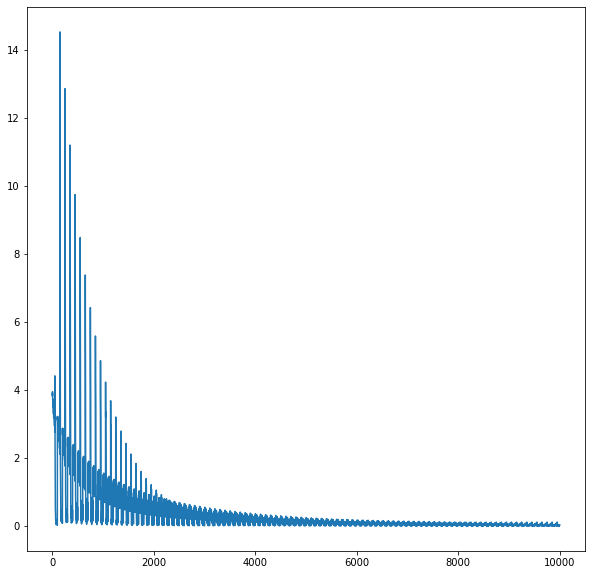

In [591]:
fig=plt.figure(figsize=(10,10))

# for i in range(len(train_loss_epoch)):
#     fig.add_subplot(5,5,i+1)
plt.plot(train_loss_epoch[0])
    

In [396]:
# for i in range(10):
#     print(f"for epoch {i} | train_loss :: {train_loss[i]}".format(i,train_loss[i]))

for epoch 0 | train_loss :: 3.9031741619110107
for epoch 1 | train_loss :: 3.917754888534546
for epoch 2 | train_loss :: 3.849947929382324
for epoch 3 | train_loss :: 3.8616302013397217
for epoch 4 | train_loss :: 4.019267559051514
for epoch 5 | train_loss :: 3.9986841678619385
for epoch 6 | train_loss :: 3.888068199157715
for epoch 7 | train_loss :: 3.8113884925842285
for epoch 8 | train_loss :: 3.8542838096618652
for epoch 9 | train_loss :: 3.9109079837799072


In [215]:
x=torch.zeros(20,2)
x[:, 0] = torch.arange(-5, 5, 0.5)
x[:, 1] = torch.arange(-5, 5, 0.5)
x.reshape((-1,40))

tensor([[-5.0000, -5.0000, -4.5000, -4.5000, -4.0000, -4.0000, -3.5000, -3.5000,
         -3.0000, -3.0000, -2.5000, -2.5000, -2.0000, -2.0000, -1.5000, -1.5000,
         -1.0000, -1.0000, -0.5000, -0.5000,  0.0000,  0.0000,  0.5000,  0.5000,
          1.0000,  1.0000,  1.5000,  1.5000,  2.0000,  2.0000,  2.5000,  2.5000,
          3.0000,  3.0000,  3.5000,  3.5000,  4.0000,  4.0000,  4.5000,  4.5000]])

In [ ]:
x=torch.zeros((5,5))
x
# x.reshape(-1,25)
# x.flatten()

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [ ]:
label=torch.tensor([1])
print(label.type())

torch.LongTensor
